In [1]:
# First import matplotlib (for plotting) and skan
from glob import glob

from matplotlib import pyplot as plt
%matplotlib inline
from skan import draw
import numpy as np
from skimage import exposure
import skimage as ski

# Then import the radial hydride packagess
from HAPPY import import_image
from HAPPY import cropping_functions as crop
from HAPPY import plot_functions as plt_f
from HAPPY import radial_hydride_fraction as RHF
from HAPPY import branching as branch
from HAPPY import crack_path as cp
from HAPPY import image_processing
from HAPPY import threshold


In [3]:
np.__version__

'1.26.4'

## Importing Image

- First, import the image using the `import_image` command. Transpose the image if necessary using the `transpose` argument to make the radial direction vertical. 
- The `cropImage` function applies a rectangular crop to the image to remove scale bars, or if you have a specific rectangular region you want to look at. 
- Input Scale Bar Value in Scale_Bar_Micron_Value and Pixels_In_Scale_Bar, the scale bar will then be calculated.

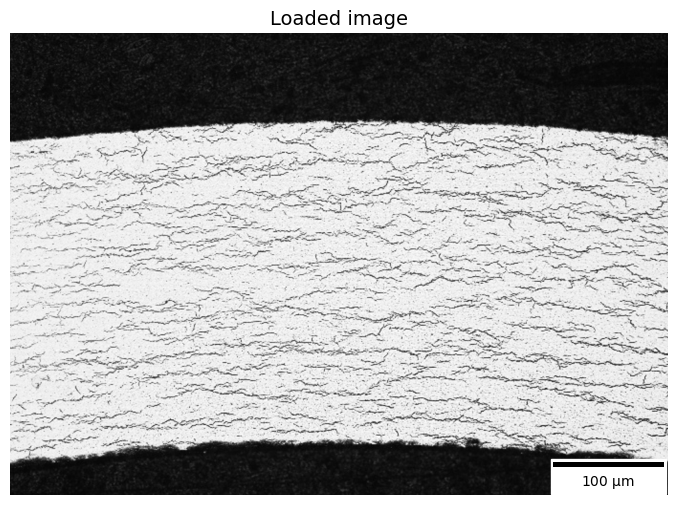

In [4]:
# Load image
original_image = import_image.image(image_path ='data/520-5b.png', transpose = False)
cropped_image = crop.cropImage(original_image, crop_bottom=50, crop_top=0, crop_left=0, crop_right=0)
crop1 = cropped_image
# Input the value of the scale bar in microns
Scale_Bar_Micron_Value = 100
#Input how many pixels are in your scale bar
Pixels_In_Scale_Bar = 165.5
Scale_Bar_Value_In_Meters = Scale_Bar_Micron_Value*(1e-6)
scale = Scale_Bar_Value_In_Meters/Pixels_In_Scale_Bar 
scale_um = scale*1e6
location = 'lower right'


# Plot image
plt_f.plot(img=cropped_image, title='Loaded image',scale=scale, location=location)


## Additional Cropping

The second crop function is `cropping_tube`, which should be used if the micrograph is curved and removes black pats of the image which are not the tube. A crop_param of around 0.1-0.2 is reccomended.

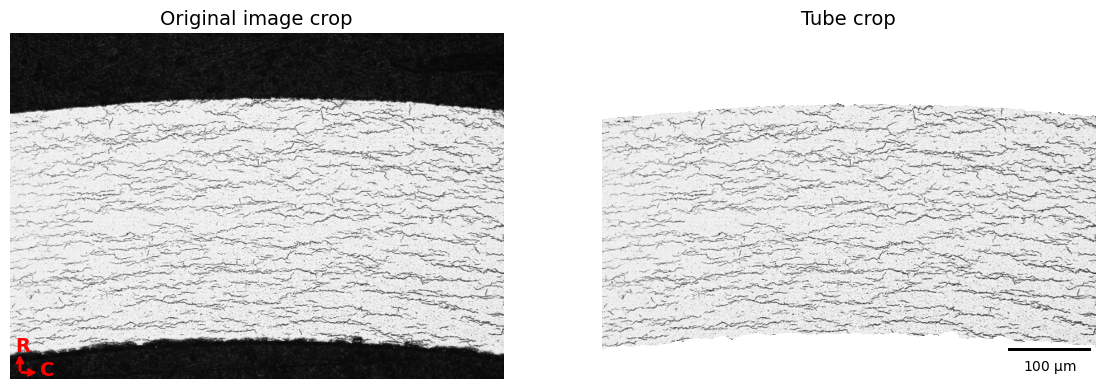

In [5]:
# Crop tube
cropped_image, crop_threshold = crop.cropping_tube(cropped_image, 
                                                   crop_param = 0.2, size_param = 1000, dilation_param = 10)

# Plot comparison
plt_f.plot_comparison(crop1, 'Original image crop', cropped_image, 'Tube crop',scale=scale, 
                   location=location)

In [ ]:
ski

## Image Processing

Grain contast or uneven lighting can be minimised through the application of a gaussian blur in the `minimize_grain_contrast` function. A value of 10 seems to work for most cases. 

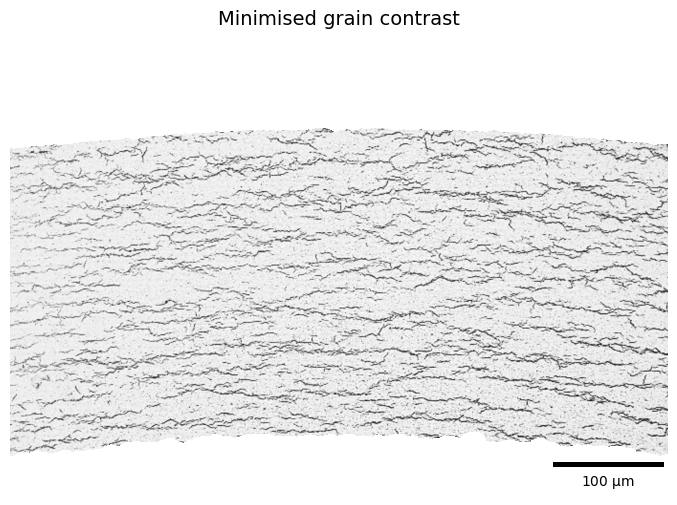

Approximate threshold: 0.982


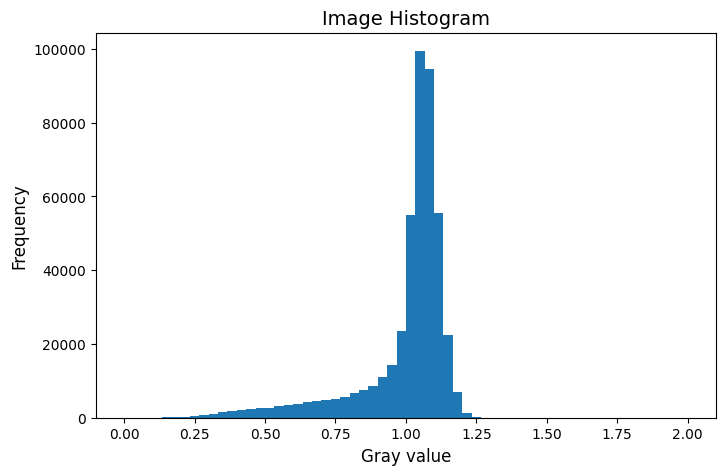

In [6]:
# Remove grain contrast
removed_grains = image_processing.minimize_grain_contrast(cropped_image, sigma = 10)

# Plot image
plt_f.plot(img=cropped_image, title='Minimised grain contrast', scale=scale, location=location)

# Plot the histogram for removed grains so that we can see where we should threshold 
histogram = plt_f.plot_hist(removed_grains)

# Print an approximate threshold value which should work well
print('Approximate threshold: {0:.3f}'.format(
    2*np.nanmedian(removed_grains)-np.nanpercentile(removed_grains, 90)))

In [8]:
glob('data/horizontal/*')

['data/horizontal/520-7b.png',
 'data/horizontal/520-6m.png',
 'data/horizontal/520-5m.png',
 'data/horizontal/520-6h.png',
 'data/horizontal/520-5b.png']

In [18]:
def show_histogram(img_path,sigma=10):
    original_image = import_image.image(image_path =img_path, transpose = False)
    cropped_image = crop.cropImage(original_image, crop_bottom=50, crop_top=0, crop_left=0, crop_right=0)
    crop1 = cropped_image
    # Input the value of the scale bar in microns
    Scale_Bar_Micron_Value = 100
    #Input how many pixels are in your scale bar
    Pixels_In_Scale_Bar = 165.5
    Scale_Bar_Value_In_Meters = Scale_Bar_Micron_Value*(1e-6)
    scale = Scale_Bar_Value_In_Meters/Pixels_In_Scale_Bar 
    scale_um = scale*1e6
    location = 'lower right'

    removed_grains = image_processing.minimize_grain_contrast(cropped_image, sigma = sigma)

    # Plot image
    plt_f.plot(img=cropped_image, title='Minimised grain contrast', scale=scale, location=location)
    
    # Plot the histogram for removed grains so that we can see where we should threshold 
    histogram = plt_f.plot_hist(removed_grains)

    return removed_grains

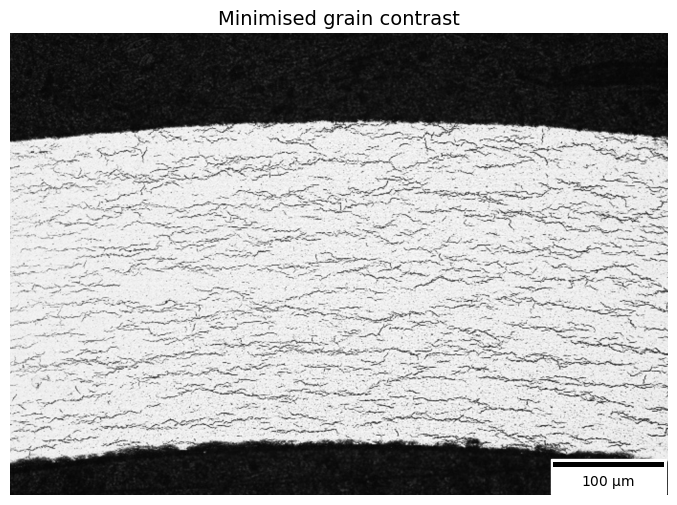

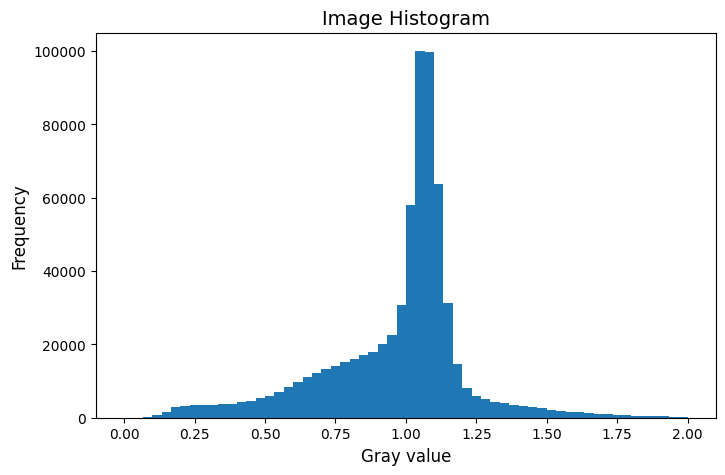

In [19]:
img = show_histogram('data/horizontal/520-5b.png')

## Thresholding

After this, the image is thresholded using the `simple_threshold` function. The threshold value should be set using the `threshold` argument. Small features, less than a given size in microns `small_obj` can optionally be removed. Note it is important not too over threshold the image, guidance of a value to threshold is shown above and can be determined by investigating the histograms plotted above.

In [20]:
type(removed_grains)

NoneType

In [21]:
np.isnan(removed_grains).sum().sum()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

_,triangle_thres = cv.threshold(removed_grains,1,255,cv.THRESH_BINARY)
plt_f.plot_comparison(removed_grains, 'Original Image', triangle_thres,'Thresholded Image', scale=scale,location=location)

In [22]:
removed_grains[~np.isnan(removed_grains)].flatten()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [27]:
glob('data/horizontal/*')

['data/horizontal/520-7b.png',
 'data/horizontal/520-6m.png',
 'data/horizontal/520-5m.png',
 'data/horizontal/520-6h.png',
 'data/horizontal/520-5b.png']

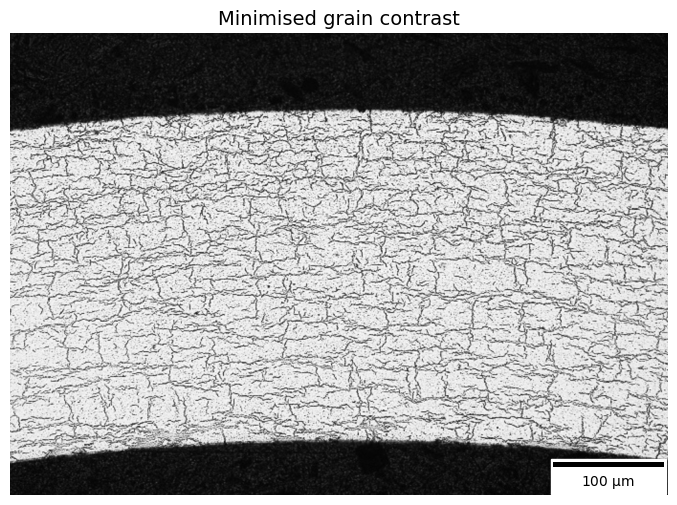

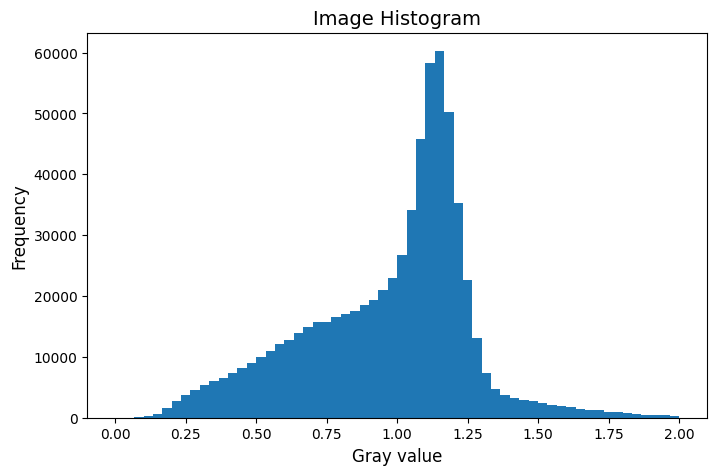

In [54]:
removed_grains = show_histogram('data/horizontal/520-6m.png')

In [55]:
removed_grains

array([[1.0058065 , 0.83638588, 0.95847346, ..., 0.9987249 , 0.84346543,
        0.84593839],
       [1.05740179, 0.99075782, 1.01623527, ..., 0.9993891 , 0.82784103,
        0.73242977],
       [1.00939446, 1.06815738, 1.12184507, ..., 0.85043333, 0.91815763,
        0.92052277],
       ...,
       [0.81950207, 0.8885477 , 0.93289428, ..., 0.71286731, 0.94697871,
        0.91749312],
       [0.79849642, 0.74222882, 0.82234947, ..., 0.82030256, 0.97301372,
        0.95116204],
       [1.0056267 , 0.98065509, 1.04854956, ..., 1.00086487, 0.91853413,
        0.80372794]])

In [56]:
print(f'Isodata:{threshold.threshold_isodata(removed_grains)}')
print(f'Li:{threshold.threshold_li(removed_grains)}')
print(f'Mean:{threshold.threshold_mean(removed_grains)}')
print(f'Minimum:{threshold.threshold_minimum(removed_grains)}')
print(f'Otsu:{threshold.threshold_otsu(removed_grains)}')
print(f'Triangle:{threshold.threshold_triangle(removed_grains)}')
print(f'Yen:{threshold.threshold_yen(removed_grains)}')

Isodata:0.8739198611722421
Li:0.8282530932036741
Mean:0.9768160629422074
Minimum:3.473496067633165
Otsu:0.8739198611722421
Triangle:1.3818830279519627
Yen:2.547210292917204


HAPPY.threshold.threshold_isodata
HAPPY.threshold.threshold_li
HAPPY.threshold.threshold_mean
HAPPY.threshold.threshold_minimum
HAPPY.threshold.threshold_otsu
HAPPY.threshold.threshold_triangle
HAPPY.threshold.threshold_yen


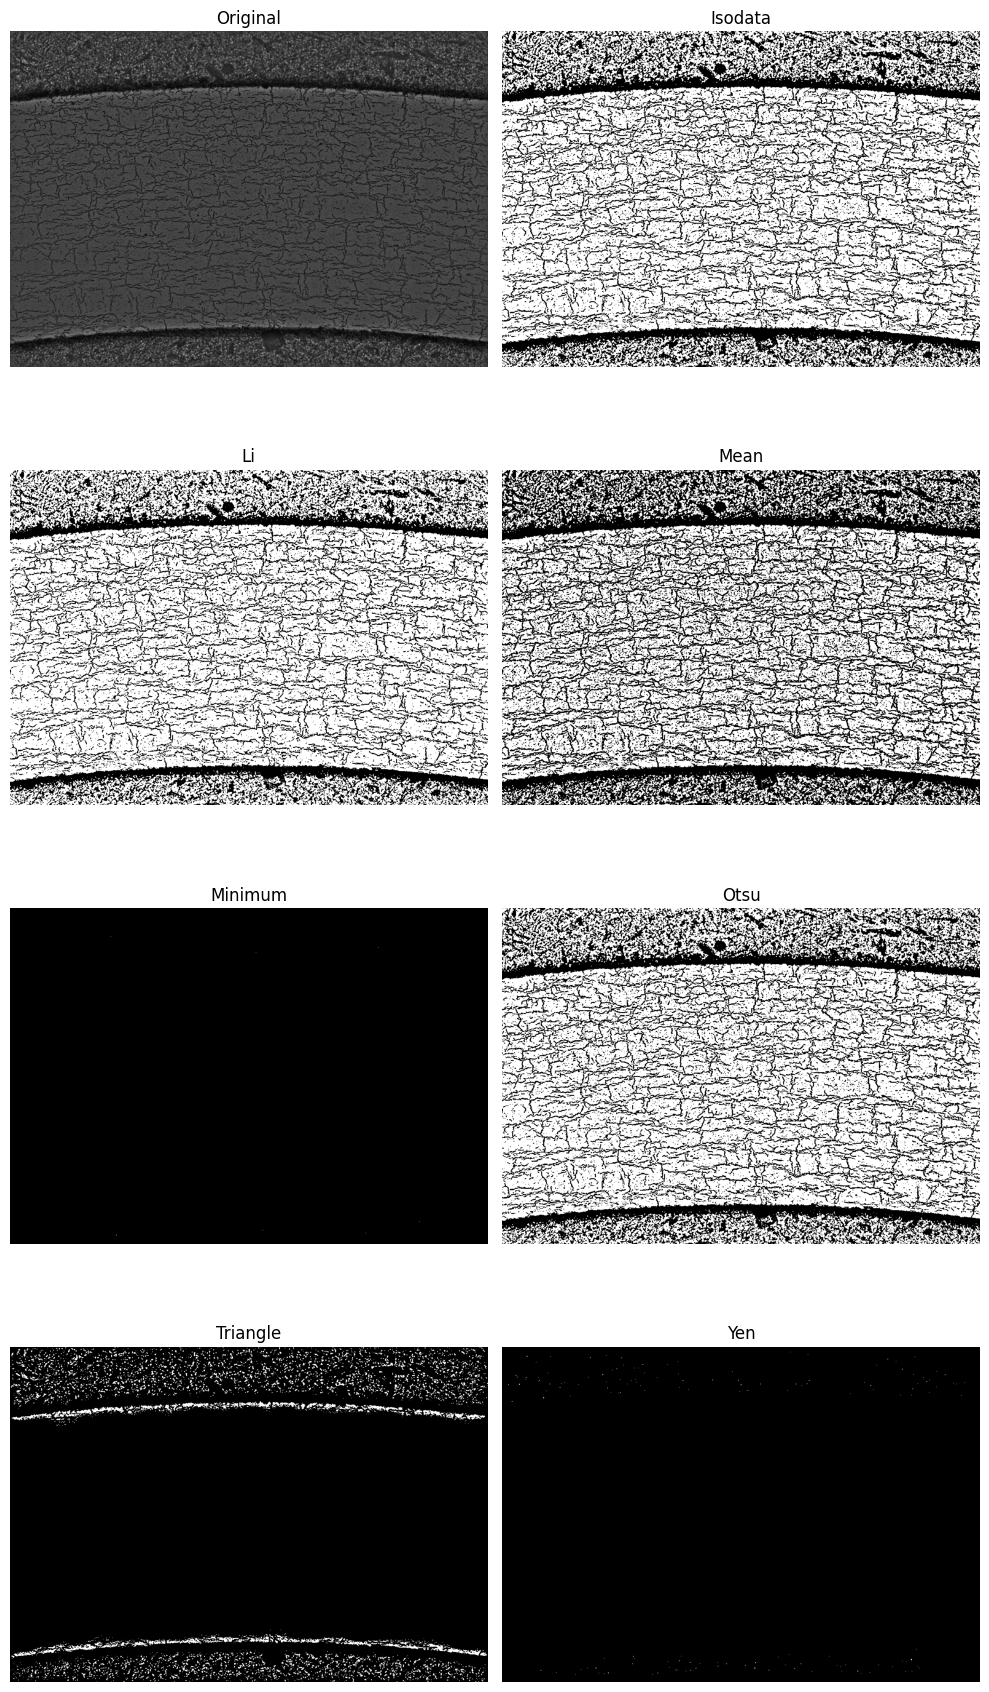

In [57]:
fig, ax = threshold.try_all_threshold(removed_grains, figsize=(10, 18), verbose=True)
plt.show()

In [58]:
isodata_threshold = threshold.threshold_isodata(removed_grains)
print(f'Li:{threshold.threshold_li(removed_grains)}')
print(f'Mean:{threshold.threshold_mean(removed_grains)}')
print(f'Minimum:{threshold.threshold_minimum(removed_grains)}')
print(f'Otsu:{threshold.threshold_otsu(removed_grains)}')
print(f'Triangle:{threshold.threshold_triangle(removed_grains)}')
print(f'Yen:{threshold.threshold_yen(removed_grains)}')

Li:0.8282530932036741
Mean:0.9768160629422074
Minimum:3.473496067633165
Otsu:0.8739198611722421
Triangle:1.3818830279519627
Yen:2.547210292917204


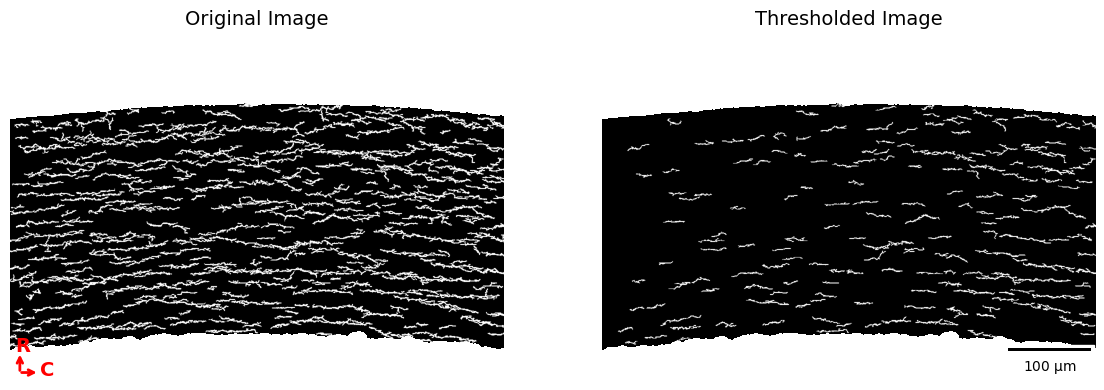

In [46]:
thres_otsu = threshold.threshold_otsu(removed_grains)
otsu_thres_img = image_processing.simple_threshold(removed_grains,scale_um, crop_threshold, 
                                          threshold = thres_otsu, small_obj = 40)

plt_f.plot_comparison(thres, 'Original Image', otsu_thres_img,'Thresholded Image', scale=scale,location=location)

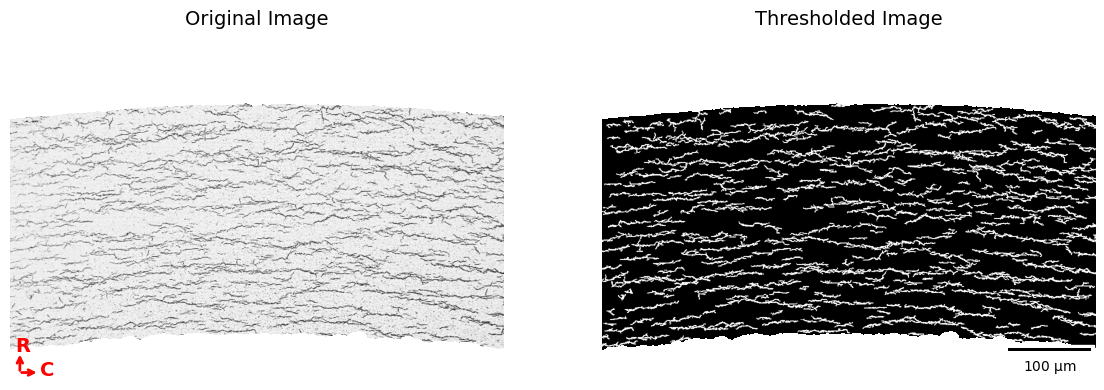

In [13]:
# Apply threshold
thres = image_processing.simple_threshold(removed_grains,scale_um, crop_threshold, 
                                          threshold = 0.98, small_obj = 40)

# Plot the thresholded image and compare it to the original image: 
plt_f.plot_comparison(cropped_image, 'Original Image', thres,'Thresholded Image', scale=scale,location=location)


The first step is to perform the hough line transform `hough_rad` there are a few input parameters that should be considered: 
- `num_peaks`: should be changed dependent on the type of micrograph, if your hydrides are straight and not very interconnected a small value of around 2 is good, if in one box, there are many branches that need to be picked up, this value should be increased accordingly to a value of 5 or more.
- `min_dist`, `min_angle` and `val` are pre-set and seem to work for most cases.
        

In [53]:
thres_triangle = threshold.threshold_triangle(removed_grains)
triangle_thres_img = image_processing.simple_threshold(removed_grains,scale_um, crop_threshold, 
                                          threshold = thres_triangle, small_obj = 40)

plt_f.plot_comparison(thres, 'Original Image', triangle_thres_img,'Thresholded Image', scale=scale,location=location)

NameError: name 'thres' is not defined

Number of detected angles: 333


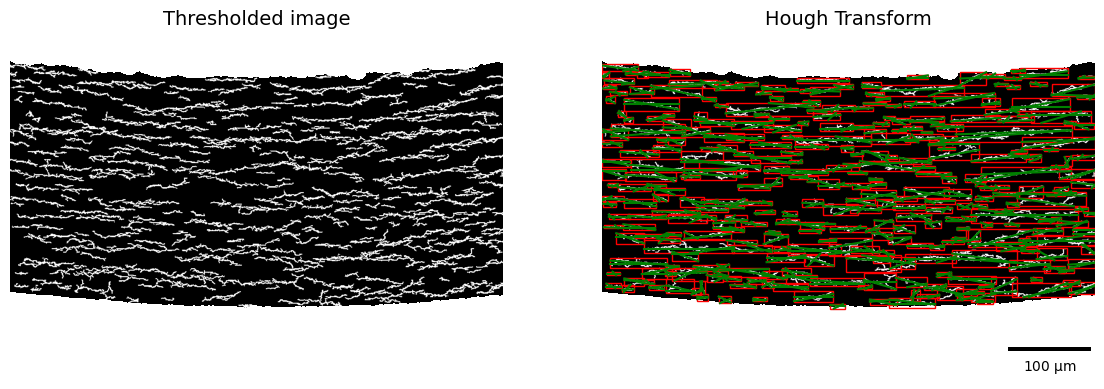

In [14]:
# Apply Hough transform
angle_list,len_list = RHF.hough_rad(thres, num_peaks=2, scale=scale, location=location)

In [15]:
#Non weighted radial hydride fraction
radial, circumferential = RHF.RHF_no_weighting_factor(angle_list, len_list)

print('The non-weighted RHF  is {0:.4f}'.format(radial))

The non-weighted RHF  is 0.0109


In [16]:
#Weighted Radial Hydride Fraction 
fraction = RHF.weighted_RHF_calculation(angle_list, len_list)

print('The weighted RHF is: {0:.4f}'.format(fraction))

The weighted RHF is: 0.0228


## Other Methods for Radial Hydride Fraction Calculation

Here all four different RHF calculation methods are shown in the graph

In [22]:
#chu radial hydride calculation
deg_angle_list = np.rad2deg(angle_list)

radial_list_chu=[]
circum_list_chu = []

for k in deg_angle_list:
    if (k>0 and k<40) or (k>-40 and k<0) :
        radial_list_chu.append(len_list)
    elif (k>50 and k<90) or (k>-90 and k<-50):
        circum_list_chu.append(len_list)
  

rad_hyd_chu = np.sum(radial_list_chu)
cir_hyd_chu = np.sum(circum_list_chu)


RHFChu = rad_hyd_chu/(rad_hyd_chu+cir_hyd_chu)


#RHF 40 deg
radial_list_40=[]
circum_list_40 = []

for k in deg_angle_list:
    if (k>0 and k<40) or (k>-40 and k<0) :
        radial_list_40.append(len_list)
    elif (k>=40 and k<90) or (k>-90 and k<=-40):
        circum_list_40.append(len_list)
  

rad_hyd_40 = np.sum(radial_list_40)
cir_hyd_40 = np.sum(circum_list_40)


RHF40 = rad_hyd_40/(rad_hyd_40+cir_hyd_40)

import pandas as pd 
# intialise data of lists.
data = {"RHF": [RHF40,radial,fraction,RHFChu]
       }
 
# Create DataFrame
df = pd.DataFrame(data,index=["40 Degrees", "45 Degrees", "Weighted", "Chu"])
display(df)

#d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}



RHF
40 Degrees  0.010772
45 Degrees  0.010920
Weighted    0.022761
Chu         0.012048

## Mean Hydride Length

Code for determining the MHL

In [23]:
from scipy import ndimage

hydride_len = []
label, num_features = ndimage.label(thres > 0.1)
slices = ndimage.find_objects(label)
for feature in np.arange(num_features):
    hydride_len.append(scale_um*label[slices[feature]].shape[1])

#print(hydride_len)
print(np.mean(hydride_len))

31.677599049200253


## Branch Length Fraction

Here we want to determine the extent of branching within the microstrucutre, this is done in two ways: 
- In image form where the branches are coloured differently to the main hydride
- BLF the length fraction of branches with respect to the toatal length of all hydrides in the microstrucutre

The BLF is: 0.2672


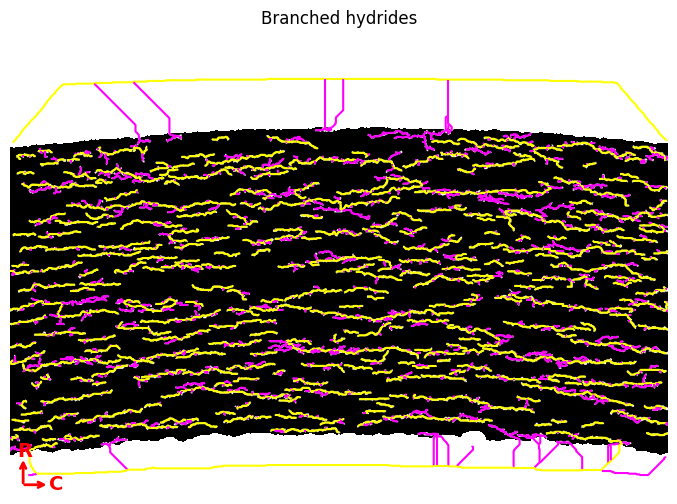

In [24]:
# Calculate the branch length fraction
skel,is_main,BLF = branch.branch_classification(thres);


# Plot branching image
fig, ax = plt.subplots(figsize=(10,6))
ax = draw.overlay_skeleton_2d_class(
    skel,
    skeleton_color_source=lambda s: is_main,
    skeleton_colormap='spring',
    axes=ax
     )

plt.axis('off')
plt.title('Branched hydrides')
#plt_f.addScaleBar(ax[0], scale=scale, location=location)
plt_f.addArrows(ax[0])

print('The BLF is: {0:.4f}'.format(BLF))

## Crack Path

Here we want to determine potential crack paths through the microstrucutre, we input the thresholded image `thres`. After running once, the area around that path (radius set with `kernel_size`) is discounted, then the process is repeated `num_runs` times. Here the `distance_weight` makes moving in the circumferential direction more costly, note when comparing different micrographs, ensure that this parameter it is kept constant. We reccomend a weighting of 1.5 and a kernel size of 20. 

In [25]:
# Determing potential crack paths
edist, path_list, cost_list = cp.det_crack_path(thres, crop_threshold, num_runs=5, kernel_size=20,distance_weight=1.5)

Run #0	Cost = 1900.76
Run #1	Cost = 1932.46
Run #2	Cost = 1955.84
Run #3	Cost = 2013.34
Run #4	Cost = 2109.73


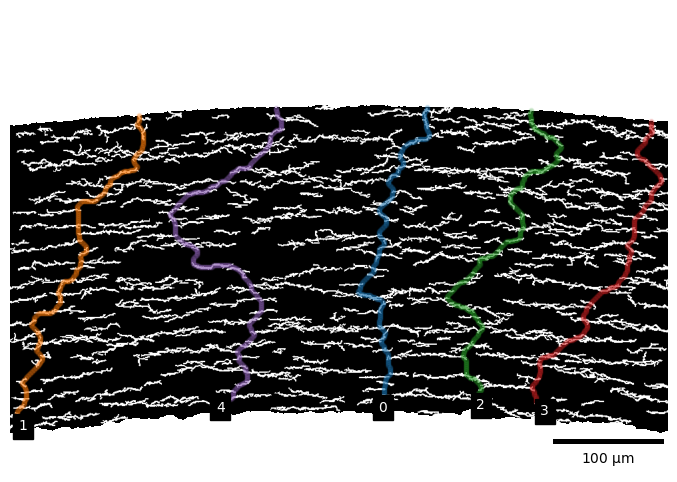

In [26]:
# Plot possible crack paths
fig, ax = plt.subplots(figsize=(10,6))
list_costs = []

for n, (p, c) in enumerate(zip(path_list, cost_list)):
    
    im = ax.imshow(thres, cmap='gray')
    
    #if n==0:
      #  plt.colorbar(im,fraction=0.03, pad=0.01)
    ax.scatter(p[:,1], p[:,0], s=10, alpha=0.1)
    ax.text(p[-1][1], p[-1][0], s=str(n), c='w', bbox=dict(facecolor='black', edgecolor='black'))
    plt.axis('off')
    print('Run #{0}\tCost = {1:.2f}'.format(n,c))
    list_costs.append(c)
    
plt_f.addScaleBar(ax, scale=scale, location=location)
plt_f.addArrows(ax)

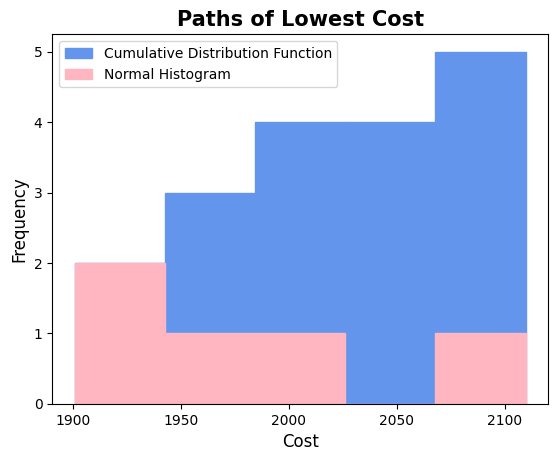

In [27]:
# Histograms for plotting the costs of each path
plt.hist(list_costs, bins=5, cumulative = True, color = "cornflowerblue", ec="cornflowerblue", label = "Cumulative Distribution Function")
plt.hist(list_costs, bins=5, color = "lightpink", ec="lightpink", label = "Normal Histogram")
plt.legend()
plt.xlabel('Cost', fontsize="12")
plt.ylabel('Frequency',fontsize="12")
plt.title('Paths of Lowest Cost', fontweight="bold", fontsize="15")
plt.show()

You can chose to skeletonize the image if you want, not reccomended unless there are too many hydrides to be able to distinguish between them. 


(-0.5, 987.5, 693.5, -0.5)

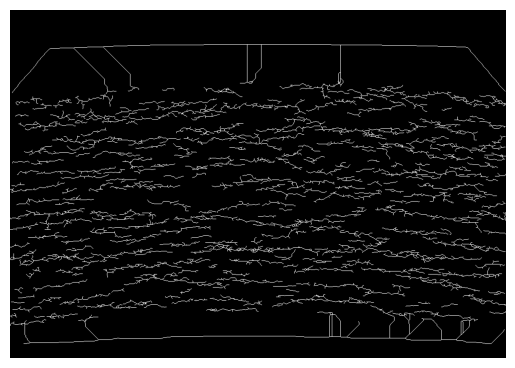

In [28]:
from skimage.morphology import skeletonize
skeletonised = skeletonize(thres)
plt.imshow(skeletonised,cmap='gray')
plt.axis('off')



